<a href="https://colab.research.google.com/github/daiki-skm/oreilly-web-optimization/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=a05618b10ff8e7acd5db76542bf1379b53e587a383eb4b41f644c7466ee385cc
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-3-186e943752ff>:11: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, compact=True)


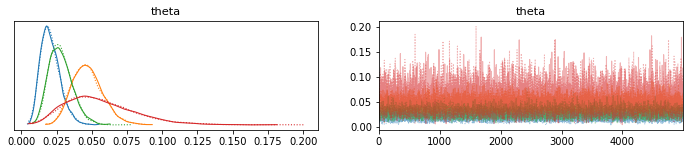

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

n = [434,382,394,88]
clicks = [8,17,10,4]
with pm.Model() as Model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=len(n))
  obs = pm.Binomial('a', p=theta, n=n, observed=clicks)
  trace = pm.sample(5000, chains=2)
  pm.traceplot(trace, compact=True)

In [ ]:
with Model:
  print(pm.summary(trace,hdi_prob=0.95))

           mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta[0]  0.021  0.007     0.009      0.035        0.0      0.0   13508.0   
theta[1]  0.047  0.011     0.026      0.068        0.0      0.0   10918.0   
theta[2]  0.028  0.008     0.013      0.044        0.0      0.0   14615.0   
theta[3]  0.056  0.025     0.014      0.104        0.0      0.0   13979.0   

          ess_tail  r_hat  
theta[0]    7366.0    1.0  
theta[1]    7336.0    1.0  
theta[2]    7664.0    1.0  
theta[3]    7737.0    1.0  


<ipython-input-7-bf493f3113cc>:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace,combined=True,hdi_prob=0.95)


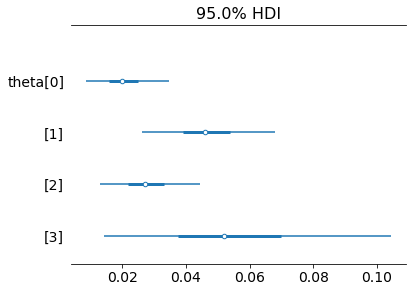

In [ ]:
with Model:
  pm.forestplot(trace,combined=True,hdi_prob=0.95)

In [ ]:
print((trace['theta'][:,1] - trace['theta'][:,0] > 0).mean())

0.9836


In [ ]:
print((trace['theta'][:,3] - trace['theta'][:,0] > 0).mean())

0.9428


In [ ]:
img = [0,0,1,1]
btn = [0,1,0,1]
with pm.Model() as model_comb:
  alpha = pm.Normal('alpha',mu=0,sigma=10)
  beta = pm.Normal('beta',mu=0,sigma=10,shape=2)
  comb = alpha+beta[0]*img+beta[1]*btn
  theta = pm.Deterministic('theta',1/(1+pm.math.exp(-comb)))
  obs = pm.Binomial('obs',p=theta,n=n,observed=clicks)
  trace_comb = pm.sample(5000,chains=2)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-12-0186fd7b4e16>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_comb)


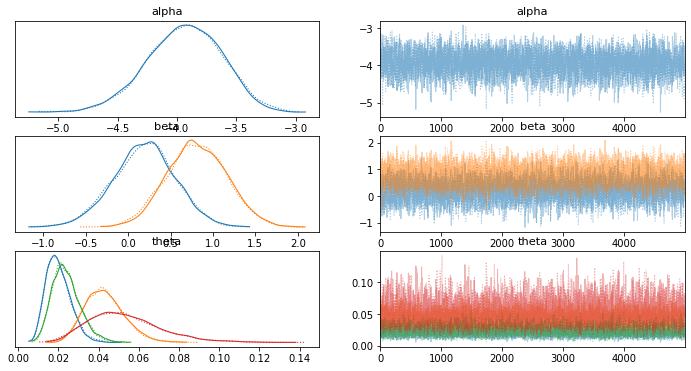

In [ ]:
with model_comb:
  pm.traceplot(trace_comb)

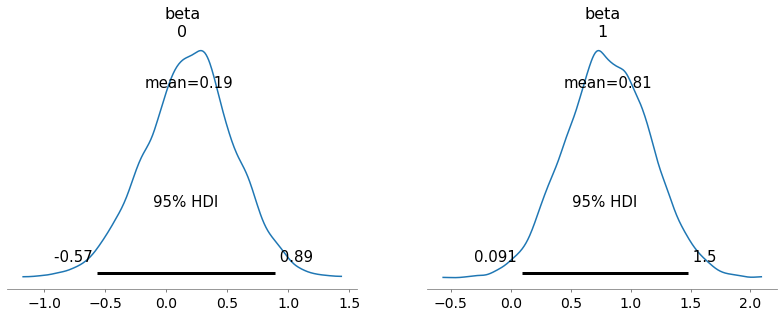

In [ ]:
with model_comb:
  pm.plot_posterior(trace_comb,var_names=['beta'],hdi_prob=0.95)

In [ ]:
print((trace_comb['beta'][:,1] > 0).mean())

0.9897


<ipython-input-17-b3314e3db19c>:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot([trace,trace_comb],var_names=['theta'],hdi_prob=0.95,combined=True,model_names=['Individual','Combined'])


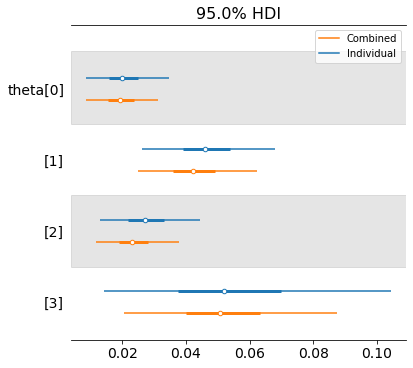

In [ ]:
with pm.Model():
  pm.forestplot([trace,trace_comb],var_names=['theta'],hdi_prob=0.95,combined=True,model_names=['Individual','Combined'])

In [ ]:
print((trace_comb['theta'][:,1] - trace_comb['theta'][:,0] > 0).mean())

0.9897


In [ ]:
print((trace_comb['theta'][:,3] - trace_comb['theta'][:,0] > 0).mean())

0.9525


/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-20-ec7864abdf77>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_comb2, compact=True)


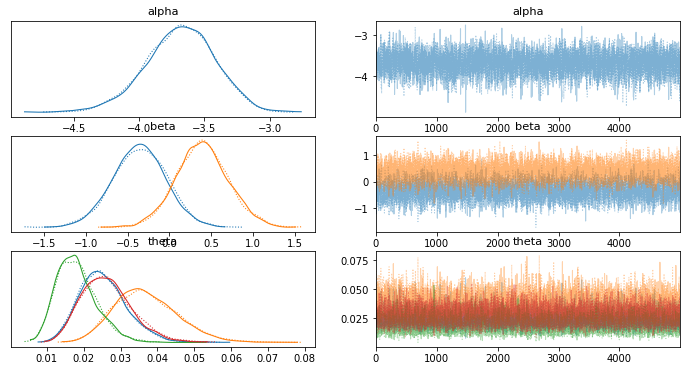

In [ ]:
n = [434,382,394,412]
clicks = [8,17,10,8]
img = [0,0,1,1]
btn = [0,1,0,1]
with pm.Model() as model_comb2:
  alpha = pm.Normal('alpha',mu=0,sigma=10)
  beta = pm.Normal('beta',mu=0,sigma=10,shape=2)
  comb = alpha+beta[0]*img+beta[1]*btn
  theta = pm.Deterministic('theta',1/(1+pm.math.exp(-comb)))
  obs = pm.Binomial('obs',p=theta,n=n,observed=clicks)
  trace_comb2 = pm.sample(5000,chains=2)
  pm.traceplot(trace_comb2, compact=True)

In [ ]:
print((trace_comb2['beta'][:,1] > 0).mean())

0.9029


/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
<ipython-input-23-63d4e2793a69>:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_int, compact=True)


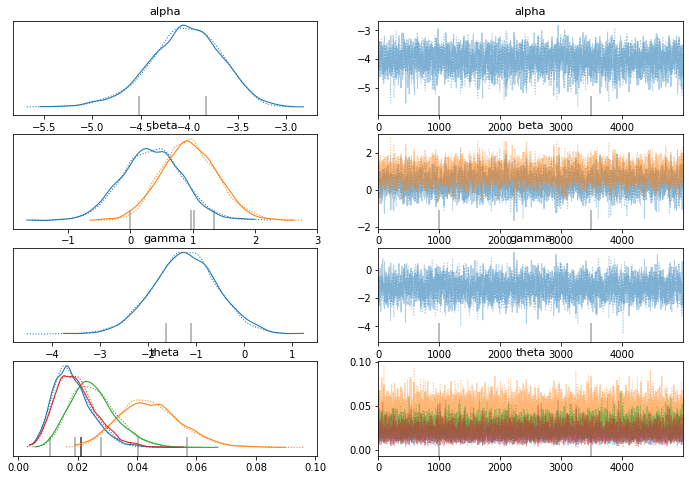

In [ ]:
with pm.Model() as model_int:
  alpha = pm.Normal('alpha',mu=0,sigma=10)
  beta = pm.Normal('beta',mu=0,sigma=10,shape=2)
  gamma = pm.Normal('gamma',mu=0,sigma=10)
  comb = alpha+beta[0]*img+beta[1]*btn+gamma*img*btn
  theta = pm.Deterministic('theta',1/(1+pm.math.exp(-comb)))
  obs = pm.Binomial('obs',p=theta,n=n,observed=clicks)
  trace_int = pm.sample(5000,chains=2)
  pm.traceplot(trace_int, compact=True)

In [ ]:
print((trace_int['gamma'] < 0).mean())

0.9674


In [ ]:
print((trace_int['beta'][:,0] > 0).mean())

0.7623


In [ ]:
print((trace_int['beta'][:,1] > 0).mean())

0.9852


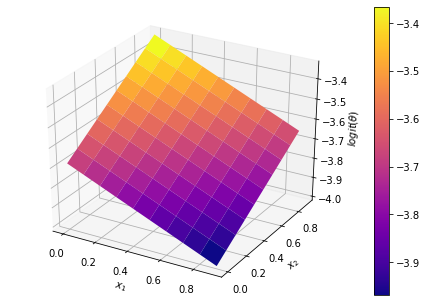

In [31]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.arange(0,1,0.1)
x2 = np.arange(0,1,0.1)
X1,X2 = np.meshgrid(x1,x2)
fig = plt.figure()
ax = Axes3D(fig)
logit_theta = (trace_comb2['alpha'].mean()+trace_comb2['beta'][:,0].mean()*X1+trace_comb2['beta'][:,1].mean()*X2)
surf = ax.plot_surface(X1,X2,logit_theta,cmap='plasma')
fig.colorbar(surf)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$logit(\theta)$')
plt.show()

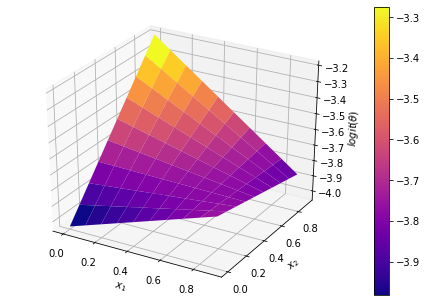

In [33]:
x1 = np.arange(0,1,0.1)
x2 = np.arange(0,1,0.1)
X1,X2 = np.meshgrid(x1,x2)
fig = plt.figure()
ax = Axes3D(fig)
Y = (trace_int['alpha'].mean()+trace_int['beta'][:,0].mean()*X1+trace_int['beta'][:,1].mean()*X2+trace_int['gamma'].mean()*X1*X2)
surf = ax.plot_surface(X1,X2,Y,cmap='plasma')
fig.colorbar(surf)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$logit(\theta)$')
plt.show()

In [35]:
waic_comb2 = pm.waic(trace_comb2,model_comb2)
waic_int = pm.waic(trace_int,model_int)
print(waic_comb2.p_waic)
print(waic_int.p_waic)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release

3.645505360180169
2.114742654086551


/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
